# Milestone 5- Merging Data and Storing in a Database / Data Visualization
## Kaylynn Mosier
## 28 May 2024

In [62]:
# Importing required packages
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

### Loading data into database

In [6]:
# Read temperature_data csv into environment
temperature_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC540/Tem Project/TemperatureData")
temperature_data

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp
0,Abidjan,Ivory Coast,1,1996,Africa,1,79.6,1996-01-01,80.513774,80.754839
1,Abidjan,Ivory Coast,1,1996,Africa,2,81.2,1996-01-02,80.513774,80.754839
2,Abidjan,Ivory Coast,1,1996,Africa,3,82.2,1996-01-03,80.513774,80.754839
3,Abidjan,Ivory Coast,1,1996,Africa,4,83.0,1996-01-04,80.513774,80.754839
4,Abidjan,Ivory Coast,1,1996,Africa,5,82.1,1996-01-05,80.513774,80.754839
...,...,...,...,...,...,...,...,...,...,...
952982,Zurich,Switzerland,12,2019,Europe,27,40.8,2019-12-27,51.086908,38.848387
952983,Zurich,Switzerland,12,2019,Europe,28,35.5,2019-12-28,51.086908,38.848387
952984,Zurich,Switzerland,12,2019,Europe,29,30.4,2019-12-29,51.086908,38.848387
952985,Zurich,Switzerland,12,2019,Europe,30,29.9,2019-12-30,51.086908,38.848387


In [20]:
# Adding data from csv file to table called temperaturedata in database
with sqlite3.connect("milestonedata.db") as conn:
    temperature_data.to_sql('temperaturedata', conn, index=True)
    conn.commit()

In [21]:
# Checking that dataframe was added to database table correctly
# Prints first row of each column
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("SELECT city, country, month, year, region, day, avgdailytemp, dateofobservation, avgyearlytemp, avgmonthlytemp FROM temperaturedata")
    for row in rows:
        print(row)
        break
cursor.close()

('Abidjan', 'Ivory Coast', 1, 1996, 'Africa', 1, 79.6, '1996-01-01', 80.5137741046832, 80.75483870967743)


In [9]:
# Read development_data csv into environment
development_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC540/Tem Project/DevelopmentData")
development_data

,Country,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
0,Albania,8.0,8.0,2.8,18.6,8.0,44.0,4.0,3.0,0.0
1,Algeria,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
2,American Samoa,0.0,0.0,8.7,15.8,8.0,12.0,1.0,1.0,0.0
3,Angola,793.0,661.0,0.0,7.0,32.0,53.0,34.0,18.0,132.0
4,Antigua and Barbuda,0.0,0.0,0.3,19.9,3.0,31.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
166,Europe & Central Asia,10232.0,10576.0,10.7,14.2,678.0,1239.0,1306.0,350.0,-344.0
167,Latin America & Caribbean,10700.0,9296.0,19.4,24.1,1117.0,1716.0,5439.0,629.0,1404.0
168,Middle East & North Africa,205.0,230.0,1.3,5.1,290.0,672.0,374.0,228.0,-25.0
169,North America,6507.0,6567.0,12.8,12.3,118.0,322.0,536.0,62.0,-60.0


In [10]:
# Adding data from csv file to table called developmentdata in database
with sqlite3.connect("milestonedata.db", timeout=30) as conn:
    development_data.to_sql('developmentdata', conn, index=False)
    conn.commit()

In [11]:
# Checking that dataframe was added to database table correctly
# Prints first row of first two columns
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    for row in cursor.execute("SELECT Country, 'Forest Area (sq.km thousands) 1990' FROM developmentdata"):
        print(row)
        break
cursor.close()

('Albania', 'Forest Area (sq.km thousands) 1990')


In [12]:
# Read air_pollution_data csv into environment
air_pollution_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC540/Tem Project/AirPollutionData")
air_pollution_data

,Country,Country Code,City,Quality Rating,Concentration CO,Concentration NO,Concentration NO2,Concentration NH3,Concentration O3,Concentration SO2,Concentration PM2.5,Concentration PM10,DateTime,Qualitative Name
0,Albania,AL,Tirana,1,208.62,0.00,3.90,2.95,40.41,0.30,8.70,10.92,2024-05-30 01:58:36,Good
1,Armenia,AM,Yerevan,1,175.24,0.00,6.86,5.00,38.62,0.60,6.12,15.66,2024-05-30 01:59:07,Good
2,Austria,AT,Vienna,1,216.96,0.00,7.28,3.01,28.61,0.66,5.24,6.72,2024-05-30 01:58:36,Good
3,Australia,AU,Brisbane,2,247.00,1.72,6.94,0.58,62.94,5.54,2.28,3.93,2024-05-30 01:58:29,Fair
4,Australia,AU,Canberra,1,223.64,0.09,0.39,0.13,47.92,0.23,3.46,3.73,2024-05-30 01:58:32,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Uganda,UG,Kampala,5,1628.88,0.09,7.45,6.59,2.48,2.27,98.01,132.54,2024-05-30 01:57:42,Very Poor
114,United States of America (the),US,Capetown,2,196.93,0.05,0.34,0.00,87.98,0.45,0.79,2.25,2024-05-30 01:57:34,Fair
115,Uzbekistan,UZ,Tashkent,1,367.17,23.69,35.30,3.77,11.36,2.92,9.00,14.01,2024-05-30 01:58:28,Good
116,Viet Nam,VN,Hanoi,3,827.79,1.30,25.71,9.12,9.66,13.95,34.47,47.49,2024-05-30 01:50:24,Moderate


In [13]:
# Adding data from csv file to table called airpollutiondata table in database
with sqlite3.connect("milestonedata.db") as conn:
    air_pollution_data.to_sql('airpollutiondata', conn, index=True)
    conn.commit()

In [14]:
# Checking that dataframe was added to database table correctly
# Prints first row of each column
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    for row in cursor.execute("SELECT Country, 'Country Code' FROM airpollutiondata"):
        print(row)
        break
cursor.close()

('Albania', 'Country Code')


## Joining Datasets

In [33]:
# Testing join before creating dataframe
# Join airpollutiondata with temperaturedata on city by left join
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    sql = """SELECT * FROM temperaturedata LEFT JOIN airpollutiondata ON temperaturedata.City = airpollutiondata.City"""
    rows = cursor.execute(sql)
    for row in rows:
        print(row)
        break
cursor.close()

(0, 'Abidjan', 'Ivory Coast', 1, 1996, 'Africa', 1, 79.6, '1996-01-01', 80.5137741046832, 80.75483870967743, 20, "Côte d'Ivoire", 'CI', 'Abidjan', 2, 327.11, 0.0, 0.83, 1.03, 22.89, 0.43, 6.29, 25.43, '2024-05-30 01:57:20', 'Fair')


In [38]:
# Empty list to append data to
data1 = []
# List of column titles
columns = ['Index1', 'City1', 'Country1', 'Month', 'Year', 'Region','Day','AvgDailyTemp','DateOfObservation',
           'AvgYearlyTemp','AvgMonthlyTemp','Index2','Country2','Country Code','City2','Quality Rating','Concentration CO',
           'Concentration NO','Concentration NO2','Concentration NH3','Concentration O3','Concentration SO2',
           'Concentration PM2.5','Concentration PM10','DateTime','Qualitative Name']


with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    # Left join airpollutiondata to temperaturedata (keeps all entries from temperaturedata)
    sql = """SELECT * FROM temperaturedata LEFT JOIN airpollutiondata ON temperaturedata.City = airpollutiondata.City"""
    rows = cursor.execute(sql)
    for row in rows:
        data1.append(row) # Appends each row to data list
cursor.close()

# Create dataframe from columns and rows
temp_pollution_frame = pd.DataFrame(data1,columns=columns)
temp_pollution_frame

,Index1,City1,Country1,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,...,Concentration CO,Concentration NO,Concentration NO2,Concentration NH3,Concentration O3,Concentration SO2,Concentration PM2.5,Concentration PM10,DateTime,Qualitative Name
0,0,Abidjan,Ivory Coast,1,1996,Africa,1,79.6,1996-01-01,80.513774,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
1,1,Abidjan,Ivory Coast,1,1996,Africa,2,81.2,1996-01-02,80.513774,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
2,2,Abidjan,Ivory Coast,1,1996,Africa,3,82.2,1996-01-03,80.513774,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
3,3,Abidjan,Ivory Coast,1,1996,Africa,4,83.0,1996-01-04,80.513774,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
4,4,Abidjan,Ivory Coast,1,1996,Africa,5,82.1,1996-01-05,80.513774,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952982,952982,Zurich,Switzerland,12,2019,Europe,27,40.8,2019-12-27,51.086908,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952983,952983,Zurich,Switzerland,12,2019,Europe,28,35.5,2019-12-28,51.086908,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952984,952984,Zurich,Switzerland,12,2019,Europe,29,30.4,2019-12-29,51.086908,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952985,952985,Zurich,Switzerland,12,2019,Europe,30,29.9,2019-12-30,51.086908,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good


In [39]:
# Delete repeated columns
temp_pollution_frame = temp_pollution_frame.drop(['Index1', 'Index2', 'City2', 'Country2'], axis=1)
temp_pollution_frame

,City1,Country1,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Concentration CO,Concentration NO,Concentration NO2,Concentration NH3,Concentration O3,Concentration SO2,Concentration PM2.5,Concentration PM10,DateTime,Qualitative Name
0,Abidjan,Ivory Coast,1,1996,Africa,1,79.6,1996-01-01,80.513774,80.754839,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
1,Abidjan,Ivory Coast,1,1996,Africa,2,81.2,1996-01-02,80.513774,80.754839,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
2,Abidjan,Ivory Coast,1,1996,Africa,3,82.2,1996-01-03,80.513774,80.754839,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
3,Abidjan,Ivory Coast,1,1996,Africa,4,83.0,1996-01-04,80.513774,80.754839,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
4,Abidjan,Ivory Coast,1,1996,Africa,5,82.1,1996-01-05,80.513774,80.754839,...,327.11,0.00,0.83,1.03,22.89,0.43,6.29,25.43,2024-05-30 01:57:20,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952982,Zurich,Switzerland,12,2019,Europe,27,40.8,2019-12-27,51.086908,38.848387,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952983,Zurich,Switzerland,12,2019,Europe,28,35.5,2019-12-28,51.086908,38.848387,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952984,Zurich,Switzerland,12,2019,Europe,29,30.4,2019-12-29,51.086908,38.848387,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good
952985,Zurich,Switzerland,12,2019,Europe,30,29.9,2019-12-30,51.086908,38.848387,...,198.60,0.02,6.43,1.65,21.64,0.80,2.83,3.57,2024-05-30 01:59:14,Good


In [45]:
# Checking number of NA's
temp_pollutation_frame.isna().sum()

City1                      0
Country1                   0
Month                      0
Year                       0
Region                     0
Day                        0
AvgDailyTemp               0
DateOfObservation          0
AvgYearlyTemp              0
AvgMonthlyTemp             0
Country Code           11166
Quality Rating         11166
Concentration CO       11166
Concentration NO       11166
Concentration NO2      11166
Concentration NH3      11166
Concentration O3       11166
Concentration SO2      11166
Concentration PM2.5    11166
Concentration PM10     11166
DateTime               11166
Qualitative Name       11166
dtype: int64

In [40]:
# Load new dataasaet into database
with sqlite3.connect("milestonedata.db") as conn:
    temp_pollution_frame.to_sql('temp_pollution_data', conn, index=True)
    conn.commit()

In [41]:
# Checking that dataframe was added to database table correctly
# Prints city and one column from each of the original dataframes to make sure join actually happened
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    for row in cursor.execute("SELECT City1, AvgDailyTemp, 'Concentration CO' FROM temp_pollution_data"):
        print(row)
        break
cursor.close()

('Abidjan', 79.6, 'Concentration CO')


In [43]:
# Testing join before creating dataframe
# Join temp_polltuion_data with developmentdata on country by left join
with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    sql = """SELECT * FROM temp_pollution_data LEFT JOIN developmentdata ON temp_pollution_data.Country1 = developmentdata.Country"""
    rows = cursor.execute(sql)
    for row in rows:
        print(row)
        break
cursor.close()

(0, 'Abidjan', 'Ivory Coast', 1, 1996, 'Africa', 1, 79.6, '1996-01-01', 80.5137741046832, 80.75483870967743, 'CI', 2.0, 327.11, 0.0, 0.83, 1.03, 22.89, 0.43, 6.29, 25.43, '2024-05-30 01:57:20', 'Fair', None, None, None, None, None, None, None, None, None, None)


In [162]:
data2 = []
columns2 = ['Index1', 'City1', 'Country1', 'Month', 'Year', 'Region','Day','AvgDailyTemp','DateOfObservation',
           'AvgYearlyTemp','AvgMonthlyTemp','Country Code','Quality Rating','Concentration CO',
           'Concentration NO','Concentration NO2','Concentration NH3','Concentration O3','Concentration SO2',
           'Concentration PM2.5','Concentration PM10','DateTime','Qualitative Name','Country2','Forest Area (sq.km thousands) 1990',
            'Forest Area (sq.km thousands) 2021','Marine protected areas (% of total territorial waters) 2022',
            'Terresterial protected areas (% of total land area) 2022','Threatened Birds','Threatened Fishes',
            'Threatened Higher Plants','Threatened Mammals','Change in Forest Area 1990 to 2021']


with sqlite3.connect("milestonedata.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    # Left join temp_pollution_data to developmentdata (keeps all entries from temp_pollution_data)
    sql = """SELECT * FROM temp_pollution_data LEFT JOIN developmentdata ON temp_pollution_data.Country1 = developmentdata.Country"""
    rows = cursor.execute(sql)
    for row in rows:
        data2.append(row) # Appends each row to data list
cursor.close()

# Create dataframe from columns and rows
final_dataset = pd.DataFrame(data2,columns=columns2)
final_dataset
    

,Index1,City1,Country1,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,...,Country2,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
0,0,Abidjan,Ivory Coast,1,1996,Africa,1,79.6,1996-01-01,80.513774,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Abidjan,Ivory Coast,1,1996,Africa,2,81.2,1996-01-02,80.513774,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Abidjan,Ivory Coast,1,1996,Africa,3,82.2,1996-01-03,80.513774,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Abidjan,Ivory Coast,1,1996,Africa,4,83.0,1996-01-04,80.513774,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Abidjan,Ivory Coast,1,1996,Africa,5,82.1,1996-01-05,80.513774,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952982,952982,Zurich,Switzerland,12,2019,Europe,27,40.8,2019-12-27,51.086908,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952983,952983,Zurich,Switzerland,12,2019,Europe,28,35.5,2019-12-28,51.086908,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952984,952984,Zurich,Switzerland,12,2019,Europe,29,30.4,2019-12-29,51.086908,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952985,952985,Zurich,Switzerland,12,2019,Europe,30,29.9,2019-12-30,51.086908,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Transformation / Cleaning

In [163]:
# Drop repetative columns
final_dataset = final_dataset.drop(['Index1', 'Country2'],axis=1)

In [164]:
# Rename columns
final_dataset.rename(columns={'City1':'City', 'Country1':'Country'}, inplace=True)
final_dataset

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
0,Abidjan,Ivory Coast,1,1996,Africa,1,79.6,1996-01-01,80.513774,80.754839,...,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abidjan,Ivory Coast,1,1996,Africa,2,81.2,1996-01-02,80.513774,80.754839,...,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abidjan,Ivory Coast,1,1996,Africa,3,82.2,1996-01-03,80.513774,80.754839,...,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abidjan,Ivory Coast,1,1996,Africa,4,83.0,1996-01-04,80.513774,80.754839,...,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abidjan,Ivory Coast,1,1996,Africa,5,82.1,1996-01-05,80.513774,80.754839,...,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952982,Zurich,Switzerland,12,2019,Europe,27,40.8,2019-12-27,51.086908,38.848387,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952983,Zurich,Switzerland,12,2019,Europe,28,35.5,2019-12-28,51.086908,38.848387,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952984,Zurich,Switzerland,12,2019,Europe,29,30.4,2019-12-29,51.086908,38.848387,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952985,Zurich,Switzerland,12,2019,Europe,30,29.9,2019-12-30,51.086908,38.848387,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
# Checking number of Na values
final_dataset.isna().sum()

City                                                                0
Country                                                             0
Month                                                               0
Year                                                                0
Region                                                              0
Day                                                                 0
AvgDailyTemp                                                        0
DateOfObservation                                                   0
AvgYearlyTemp                                                       0
AvgMonthlyTemp                                                      0
Country Code                                                    11166
Quality Rating                                                  11166
Concentration CO                                                11166
Concentration NO                                                11166
Concentration NO2   

Due to my joins not being perfect, there are a lot of rows that do not have data. I have a large dataset right now, so for the sake of this project, I am going to drop any rows that contain Na values. In the real world, I would likely try to make my joins work a little better but I think this works for what I need to do now.

In [166]:
# Drop all rows that contain NA values
final_dataset = final_dataset.dropna()
final_dataset

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
15421,Algiers,Algeria,1,1996,Africa,1,67.4,1996-01-01,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15422,Algiers,Algeria,1,1996,Africa,2,60.0,1996-01-02,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15423,Algiers,Algeria,1,1996,Africa,3,54.4,1996-01-03,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15424,Algiers,Algeria,1,1996,Africa,4,57.7,1996-01-04,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15425,Algiers,Algeria,1,1996,Africa,5,57.6,1996-01-05,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944116,Zagreb,Croatia,12,2019,Europe,27,38.9,2019-12-27,56.557103,40.554839,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944117,Zagreb,Croatia,12,2019,Europe,28,37.8,2019-12-28,56.557103,40.554839,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944118,Zagreb,Croatia,12,2019,Europe,29,35.0,2019-12-29,56.557103,40.554839,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944119,Zagreb,Croatia,12,2019,Europe,30,30.3,2019-12-30,56.557103,40.554839,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0


In [167]:
# Checking unique cities
unique_cities = final_dataset['City'].unique()
unique_cities

array(['Algiers', 'Almaty', 'Amman', 'Antananarivo', 'Ashabad', 'Athens',
       'Auckland', 'Bangkok', 'Barcelona', 'Beijing', 'Beirut', 'Belfast',
       'Bilbao', 'Bissau', 'Bombay (Mumbai)', 'Bonn', 'Bordeaux',
       'Brisbane', 'Bucharest', 'Calcutta', 'Canberra', 'Capetown',
       'Chengdu', 'Chennai (Madras)', 'Colombo', 'Conakry', 'Copenhagen',
       'Cotonou', 'Dakar', 'Dar Es Salaam', 'Delhi', 'Dhaka', 'Dublin',
       'Frankfurt', 'Freetown', 'Guangzhou', 'Hamburg', 'Hanoi',
       'Helsinki', 'Islamabad', 'Jakarta', 'Karachi', 'Kiev',
       'Kuala Lumpur', 'Kuwait', 'Lagos', 'Libreville', 'Lisbon', 'Lome',
       'London', 'Madrid', 'Manama', 'Manila', 'Maputo', 'Melbourne',
       'Milan', 'Munich', 'Nairobi', 'Niamey', 'Nicosia', 'Nouakchott',
       'Osaka', 'Oslo', 'Paris', 'Perth', 'Rabat', 'Reykjavik', 'Riga',
       'Rome', 'Sapporo', 'Shanghai', 'Shenyang', 'Singapore', 'Sofia',
       'Stockholm', 'Sydney', 'Tbilisi', 'Tel Aviv', 'Tirana', 'Tokyo',
       'Tuni

The most granular dataset I have works with dialy values. However, I have calculated averages by month and year. I will drop all data that is not Day 28 from the dataset. I chose day 28 because the shortest month on a non-leap year has 28 days. My average monthly temperature will then be calculated  from the largest number of days possible in the shortest month. By doing this, I will capture all averyage monthly and yearly temperatures and significantly slim down my dataset.

In [168]:
# Subsetting data to contain only rows where Day is equal to 28
final_dataset = final_dataset[final_dataset.Day==28]
final_dataset

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
15448,Algiers,Algeria,1,1996,Africa,28,62.8,1996-01-28,63.530220,57.370968,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15479,Algiers,Algeria,1,1997,Africa,28,50.1,1997-01-28,64.926301,55.719355,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15510,Algiers,Algeria,1,1998,Africa,28,58.4,1998-01-28,63.619668,53.590323,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15540,Algiers,Algeria,1,1999,Africa,28,55.7,1999-01-28,64.923626,52.280000,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
15571,Algiers,Algeria,1,2000,Africa,28,54.0,2000-01-28,64.182787,47.235484,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943994,Zagreb,Croatia,12,2015,Europe,28,30.6,2015-12-28,55.704945,38.223333,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944024,Zagreb,Croatia,12,2016,Europe,28,35.7,2016-12-28,54.832133,31.748387,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944055,Zagreb,Croatia,12,2017,Europe,28,43.6,2017-12-28,55.572055,39.277419,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944086,Zagreb,Croatia,12,2018,Europe,28,32.6,2018-12-28,56.492758,37.122581,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0


# Visualizations

In [67]:
# Import matplotlib package
import matplotlib.pyplot as plt

### Visualization 1- Histogram of Qualitative Name for all cities combined

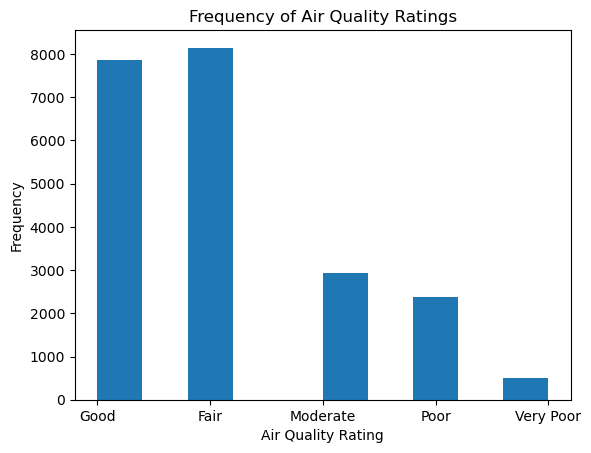

In [169]:
plt.hist(final_dataset['Qualitative Name'])
plt.xlabel('Air Quality Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Air Quality Ratings')
plt.show()

### Visualization 2- Line graph of average yearly temperature of Madrid

In [170]:
# Create a subset of the data that only shows month 12
subset1 = final_dataset[final_dataset.Month==12]
subset1

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
23577,Algiers,Algeria,12,1996,Africa,28,43.9,1996-12-28,63.530220,55.787097,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
23608,Algiers,Algeria,12,1997,Africa,28,50.7,1997-12-28,64.926301,54.964516,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
23637,Algiers,Algeria,12,1998,Africa,28,54.6,1998-12-28,63.619668,51.348148,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
23666,Algiers,Algeria,12,1999,Africa,28,58.9,1999-12-28,64.923626,53.003226,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
23697,Algiers,Algeria,12,2000,Africa,28,57.9,2000-12-28,64.182787,55.519355,...,Good,17.0,20.0,0.1,4.6,15.0,41.0,22.0,14.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943994,Zagreb,Croatia,12,2015,Europe,28,30.6,2015-12-28,55.704945,38.223333,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944024,Zagreb,Croatia,12,2016,Europe,28,35.7,2016-12-28,54.832133,31.748387,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944055,Zagreb,Croatia,12,2017,Europe,28,43.6,2017-12-28,55.572055,39.277419,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0
944086,Zagreb,Croatia,12,2018,Europe,28,32.6,2018-12-28,56.492758,37.122581,...,Good,19.0,19.0,9.0,38.5,14.0,64.0,8.0,9.0,0.0


In [171]:
# Creates a subset that contains only rows with Madrid for the city column
madrid_subset = subset1[subset1.City=='Madrid']
madrid_subset

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
560850,Madrid,Spain,12,1996,Europe,28,33.0,1996-12-28,58.828962,45.948387,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
560881,Madrid,Spain,12,1997,Europe,28,39.8,1997-12-28,60.210959,44.241935,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
560910,Madrid,Spain,12,1998,Europe,28,33.1,1998-12-28,58.719668,38.944444,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
560939,Madrid,Spain,12,1999,Europe,28,46.9,1999-12-28,58.146429,42.274194,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
560970,Madrid,Spain,12,2000,Europe,28,42.6,2000-12-28,57.804372,44.016129,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
561001,Madrid,Spain,12,2001,Europe,28,30.8,2001-12-28,57.303562,35.096774,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
561032,Madrid,Spain,12,2002,Europe,28,47.2,2002-12-28,57.889197,45.977419,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
561063,Madrid,Spain,12,2003,Europe,28,44.5,2003-12-28,58.951781,42.051613,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
561094,Madrid,Spain,12,2004,Europe,28,34.6,2004-12-28,57.572678,42.829032,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0
561125,Madrid,Spain,12,2005,Europe,28,38.8,2005-12-28,58.578630,40.870968,...,Fair,139.0,186.0,12.8,28.1,19.0,83.0,247.0,17.0,-47.0


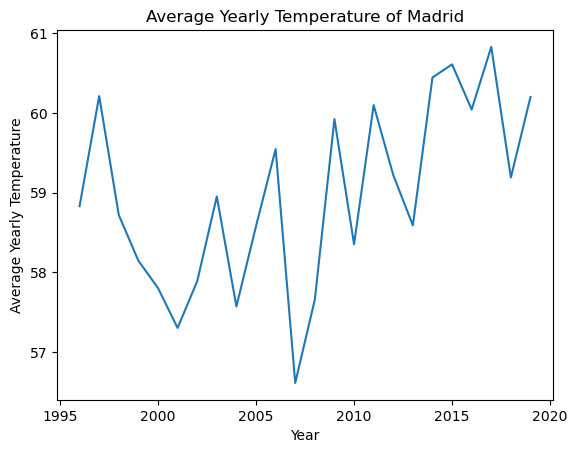

In [172]:
# Plot AvgYearlyTemp by Year for each Madrid
plt.plot(madrid_subset['Year'], madrid_subset['AvgYearlyTemp'])
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.title('Average Yearly Temperature of Madrid')
plt.show()

## Visualization 3- Scatter plot of Threatened Fish Species vs Threatened Mammal Species in 2020 for each City

In [249]:
# Subset of dataframe that contains rows where Month equls 1
species_subset = final_dataset[final_dataset.Month==1]
# Subset of previous subset where Year equals 2020
species_subset2 = species_subset[species_subset.Year==2020]

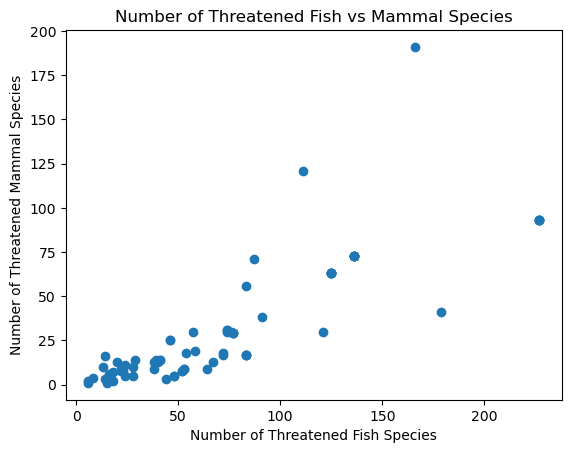

In [250]:
# Plot scatter plot of Threatened Fishes vs Threatened mammals in 2020 for each city
plt.scatter(species_subset2['Threatened Fishes'], species_subset2['Threatened Mammals'])
plt.xlabel('Number of Threatened Fish Species')
plt.ylabel('Number of Threatened Mammal Species')
plt.title('Number of Threatened Fish vs Mammal Species')
plt.show()

## Visualization 4- Scatter plot of Marine Protected Areas and Terresterial Protected Areas

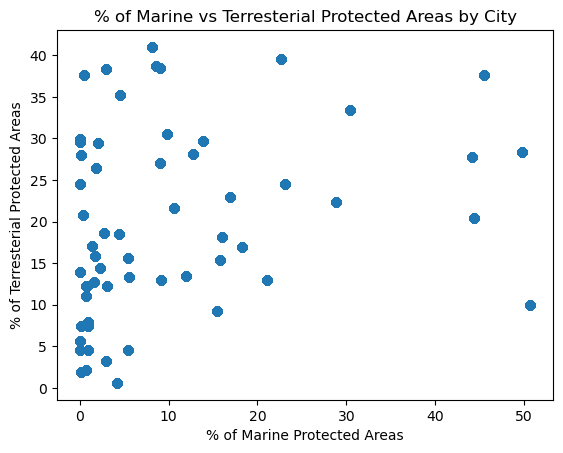

In [252]:
# Plots scatter plot of Marine Protected areas vs Terresterial protested areas of all cities
plt.scatter(final_dataset['Marine protected areas (% of total territorial waters) 2022'], final_dataset['Terresterial protected areas (% of total land area) 2022'])
plt.xlabel('% of Marine Protected Areas')
plt.ylabel('% of Terresterial Protected Areas')
plt.title('% of Marine vs Terresterial Protected Areas by City')
plt.show()

## Visualization 5- Bar Graph of Concentration CO for each City in 2020

In [251]:
# Subset1 is a subset of the final_dataset that only contains rows where Month equals 12
# Subset2 is a subset of subset1 that contains only rows where Year equals 2000
subset2 = subset1[subset1.Year==2000]

# Subset3 is a subset of subset2 that contains only rows where Qualitative Name is Poor
subset3 = subset2[subset2['Qualitative Name'] == 'Poor']
subset3

,City,Country,Month,Year,Region,Day,AvgDailyTemp,DateOfObservation,AvgYearlyTemp,AvgMonthlyTemp,...,Qualitative Name,Forest Area (sq.km thousands) 1990,Forest Area (sq.km thousands) 2021,Marine protected areas (% of total territorial waters) 2022,Terresterial protected areas (% of total land area) 2022,Threatened Birds,Threatened Fishes,Threatened Higher Plants,Threatened Mammals,Change in Forest Area 1990 to 2021
121861,Beijing,China,12,2000,Asia,28,23.6,2000-12-28,54.774317,29.970968,...,Poor,1571.0,2219.0,5.5,15.6,96.0,136.0,593.0,73.0,-648.0
363836,Delhi,India,12,2000,Asia,28,55.7,2000-12-28,76.595355,58.429032,...,Poor,639.0,724.0,0.2,7.5,93.0,227.0,396.0,93.0,-85.0
468479,Karachi,Pakistan,12,2000,Asia,28,72.2,2000-12-28,82.247557,70.361290,...,Poor,50.0,37.0,0.8,12.3,33.0,46.0,12.0,25.0,13.0
494146,Kuala Lumpur,Malaysia,12,2000,Asia,28,81.0,2000-12-28,81.777072,81.132258,...,Poor,206.0,191.0,5.6,13.3,63.0,87.0,727.0,71.0,15.0
502993,Kuwait,Kuwait,12,2000,Middle East,28,53.2,2000-12-28,80.282240,59.251613,...,Poor,0.0,0.0,1.4,17.1,11.0,18.0,0.0,7.0,0.0
569841,Manama,Bahrain,12,2000,Middle East,28,62.0,2000-12-28,80.606011,67.248387,...,Poor,0.0,0.0,21.1,13.0,7.0,14.0,0.0,3.0,0.0
784784,Shanghai,China,12,2000,Asia,28,47.8,2000-12-28,63.381096,47.893548,...,Poor,1571.0,2219.0,5.5,15.6,96.0,136.0,593.0,73.0,-648.0


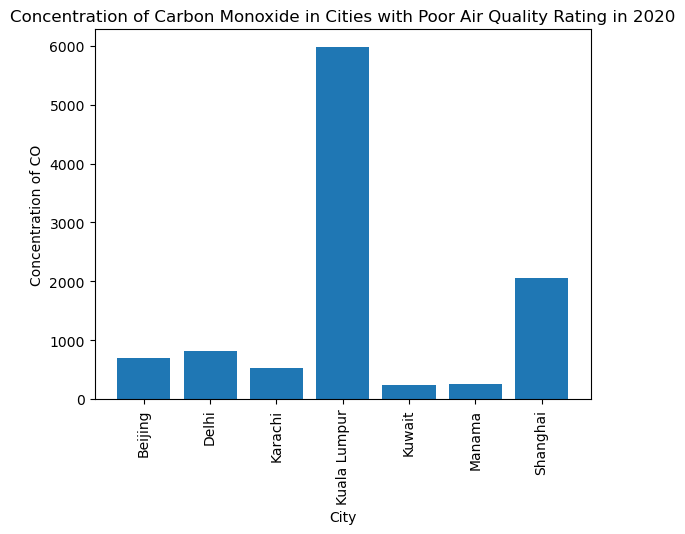

In [248]:
# Plots bar graph of Concentration of CO by City
plt.bar(subset3['City'], subset3['Concentration CO'])
plt.xlabel('City')
plt.ylabel('Concentration of CO')
plt.title('Concentration of Carbon Monoxide in Cities with Poor Air Quality Rating in 2020')
plt.xticks(rotation=90) # Rotate x-labels to be verticle
plt.show()

# Ethical Implications

As in my previous steps, I avoided making any major changes to my dataset. I did choose to reduce the granularity of my final dataset because one dataset was much more granular than my others and went into more detail than was necessary. I did utilize a lot of subsetting and filtering for my visualizations. It's possible that in doing so, I lost some critical pieces of information. If I were drawing conclusions from this data, I would need to be more careful with my filtering. It would also be helpful to plot multiple variations of some of my plots. For example, my final plot is a bar graph of Concentration of CO in cities that had a poor air quality rating in 2020. It would likely be useful to also plot concentration of CO in cities that had other ratings of air quality (very poor, moderate, fair, and good). This would allow more accurate comparison to see if there is a relationship between air quality rating and concentartion of CO. I also chose to drill down on a few cities rather than visualizing all of my cities. If I were to draw conlcusions from these visualizations, I would need to be careful to note which cities the visualization represent because others could make incorrect assumptions about the data without that information. 

Through this semester long project I've seen how difficult working with different data sources can be. During each step, I had to continually remind myself how I planned to join my datasets in the final step to help guide my transformations. I had a lot of difficulty with the HTML milestone, but I feel much more comfortable with web scraping now. I also now realize the importance of using a well documented API. Thankfully, I chose an API that has great documentation but I saw the struggles of my classmates who were not as fortunate. This class has been a great way to build on my foundational Python skills while building new skills such as SQL. 